In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# Northern GBR Data (from 7 station link)
#Link to raw data: https://coralreefwatch.noaa.gov/product/vs/data.php

#Read raw data text file
data_northern = pd.read_fwf(f'Data Exploration/gbr_northern.txt')

In [3]:
#Filtering data for years 2000 - 2019
data_northern = data_northern.loc[(data_northern['YYYY']>1999) & 
                                  (data_northern['YYYY']<2020)]
data_northern.reset_index(drop=True, inplace=True)


In [4]:
#Identify incomplete rows
#data_northern.count()

In [5]:
#Reviewing datatypes to make sure data is float or integer
# data_northern.dtypes

In [6]:
#Get mean of temperature points through grouped year for 2000-2019
grouped_year = data_northern.groupby('YYYY')
mean_temp_grouped_year = grouped_year['SST_MAX'].mean()
mean_temp_grouped_year_df = pd.DataFrame(mean_temp_grouped_year)

#Resetting index
mean_temp_grouped_year_df = mean_temp_grouped_year_df.reset_index()

#Renaming column titles
mean_temp_grouped_year_df = mean_temp_grouped_year_df.rename(columns={'YYYY':'Years',
                                                                      'SST_MAX':'Max SST'})


In [7]:
#Setting up for bar chart of Degree Heating Week values for years 2000-2019

#Link: https://coralreefwatch.noaa.gov/product/vs/description.php
#DHW_from_90th_HS>1:
#The daily Degree Heating Week value calculated by accumulating 
#daily 90th percentile HotSpot values (greater than 1) for pixels 
#contained in a Regional Virtual Station. This value is represented 
#as a solid red line on the time series graphs.

#Filtering for each year
grouped_year = data_northern.groupby('YYYY')

#Getting max amount for each year in the Degree Heating Week column
dhw_grouped_year = grouped_year['DHW_from_90th_HS>1'].max()
dhw_grouped_year_df = pd.DataFrame(dhw_grouped_year)

#Resetting index
dhw_grouped_year_df = dhw_grouped_year_df.reset_index()


#Renaming column titles
dhw_grouped_year_df = dhw_grouped_year_df.rename(columns = {'YYYY': 'Years',
                                                           'DHW_from_90th_HS>1' : 'Degree Heating Week Values'
                                                          })

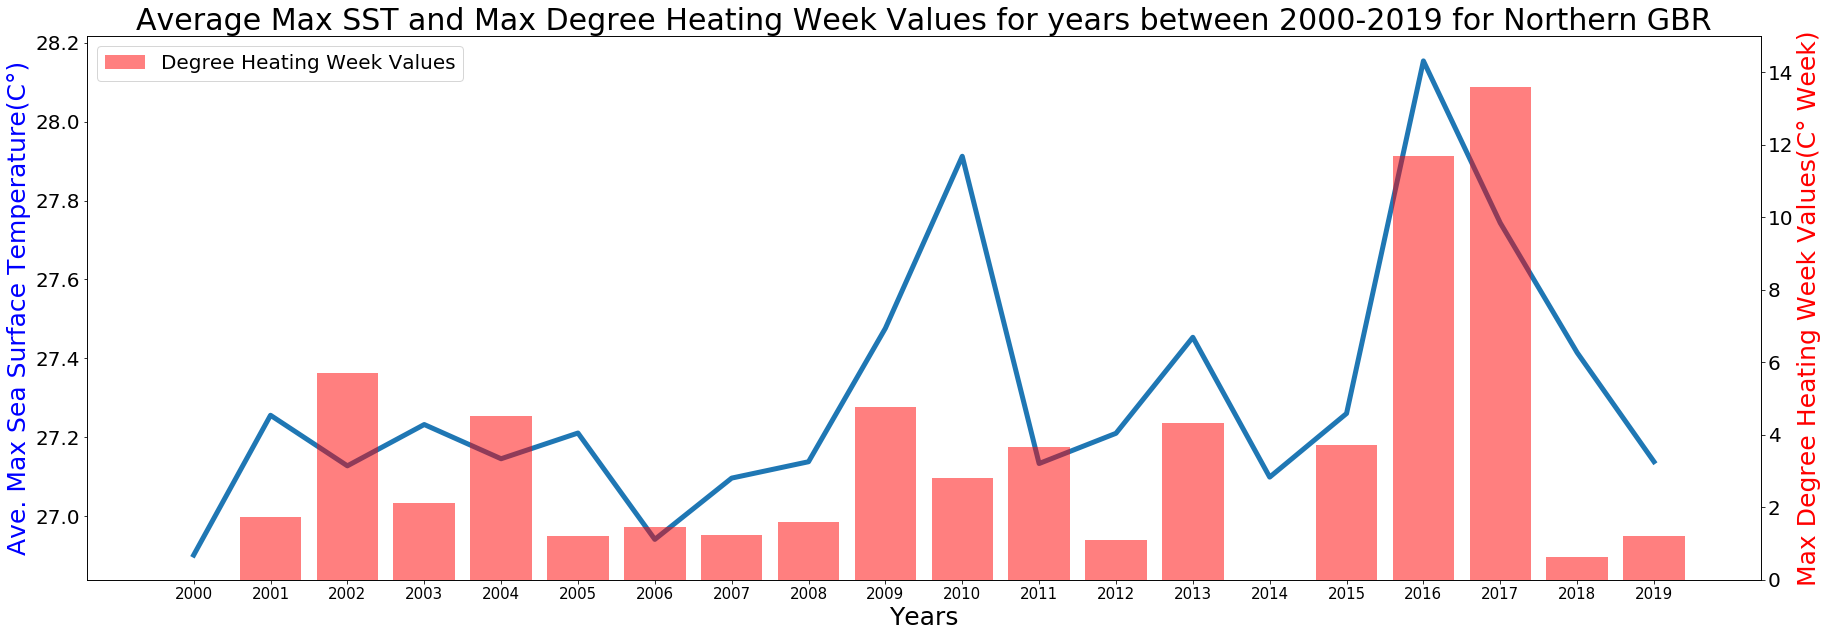

In [8]:
#Graphing Ave SST Max of 2000-2019 with histogram of Degree Heating Week values for years 

#Creating a figure and axis objects with subplots
fig, ax = plt.subplots(figsize=(30,10))

#Making the first plot of bar chart Deagree Heating Week
subplot1 = ax.plot(mean_temp_grouped_year_df['Years'], mean_temp_grouped_year_df['Max SST'],linewidth=5, label='Max Sea Surface Temperature')


#Setting x-axis and y-axis, tables, ticks, and title for bar chart
plt.xticks(dhw_grouped_year_df['Years'],fontsize="15")
plt.xlabel("Years", fontsize="25")

plt.yticks(fontsize='20')

ax.set_ylabel('Ave. Max Sea Surface Temperature(C°)', color='blue', fontsize=25)


plt.title("Average Max SST and Max Degree Heating Week Values for years between 2000-2019 for Northern GBR", fontsize="30")


#Using twin object for two different y-axis
ax2 = ax.twinx()

#Creating line plot for SST Max with different y-axis
subplot2 = ax2.bar(dhw_grouped_year_df['Years'], dhw_grouped_year_df['Degree Heating Week Values'], label='Degree Heating Week Values',color='r', alpha=0.5, align="center")

#Setting label for line plot y-axis label and ticks
plt.yticks(fontsize='20')
plt.ylim(0,15)
ax2.set_ylabel('Max Degree Heating Week Values(C° Week)', color='red', fontsize=25)


#Setting the legend
plt.legend(loc="upper left", fontsize='20')

plt.savefig(f"Output/SSTMAX and DHW for 2000-2020.png")


plt.show()



In [9]:
#Histogram for 2006, 2014 and 2010, 2016 to show the distribution 

#Function for creating histogram
def histogram_sst_max_function(year_value):
    
    histogram_sstmax = data_northern.loc[data_northern["YYYY"] == year_value]['SST_MAX']

    quartiles = histogram_sstmax.quantile([.25,.5,.75])
    lowerq= quartiles[0.25]
    upperq  = quartiles[0.75]
    iqr = upperq - lowerq
    
    return histogram_sstmax

#Calculating and storing years for 2006, 2014 and 2010, 2016  with histogram function
histogram_sstmax_2006 = histogram_sst_max_function(2006)
histogram_sstmax_2010 = histogram_sst_max_function(2010)
histogram_sstmax_2014 = histogram_sst_max_function(2014)
histogram_sstmax_2016 = histogram_sst_max_function(2016)


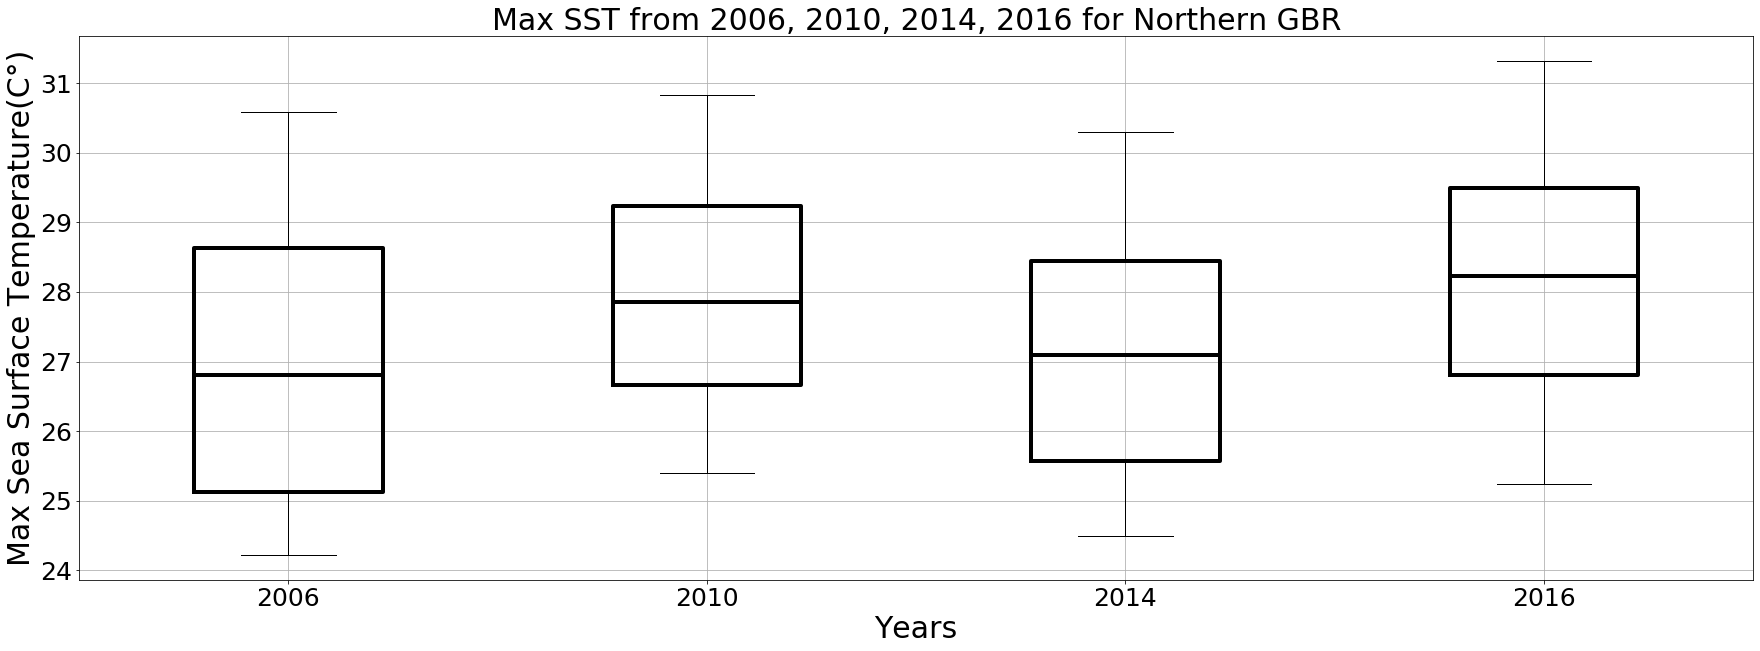

In [10]:
#Creating and formatting boxplot of data on SST Max for year 2006, 2014, 2010, 2016

#Creating figure size
fig, ax = plt.subplots(figsize=(30,10))

#Formating boxplot
plt.xticks(fontsize='25')
plt.yticks(fontsize= '25')

plt.xlabel('Years', fontsize='30')
plt.ylabel('Max Sea Surface Temperature(C°)', fontsize='30')

plt.title('Max SST from 2006, 2010, 2014, 2016 for Northern GBR', fontsize='30')

boxprops = dict(linestyle='-', linewidth=4, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='k')


#Plotting boxplot
#Boxplot color source: https://matplotlib.org/3.1.1/gallery/statistics/boxplot_color.html
#Source: https://stackoverflow.com/questions/28740234/face-pattern-for-boxes-in-boxplots
bplots = plt.boxplot([histogram_sstmax_2006, histogram_sstmax_2010,histogram_sstmax_2014, histogram_sstmax_2016], 
            labels=['2006', '2010', '2014', '2016'],
            boxprops=boxprops,
            medianprops=medianprops)


plt.grid(True)

plt.savefig(f"Output/SSTMAX boxplot for 2006-2014-2010-2016.png")

plt.show()

In [11]:
#Low temp
#Setting DataFrames for Average Maximum Monthly SST for 2006 and 2014

#Filter DataFrames for Average Maximum Monthly SST for 2006
bleach_indicator_2006_df = data_northern.loc[(data_northern["YYYY"] == 2006)]  

#Using for loop to get Manximum Monthly mean for 2000 of each month
for index, row in bleach_indicator_2006_df.iterrows(): 
    grouped_2006 = bleach_indicator_2006_df.groupby(['YYYY', 'MM'])
    mean_sstmax_grouped_2006 = grouped_2006['SST_MAX'].mean()
    mean_sstmax_grouped_2006_df = pd.DataFrame(mean_sstmax_grouped_2006 )

#Resetting index
mean_sstmax_grouped_2006_df = mean_sstmax_grouped_2006_df.reset_index()

#Renaming column titles
mean_sstmax_grouped_2006_df = mean_sstmax_grouped_2006_df.rename(columns={'YYYY':'Years',
                              'MM':'Month',
                              'SST_MAX':'Average Monthly Max SST',                                           
                             })

#---------------------------------------------------------------------------------

#Filter DataFrames for Average Maximum Monthly SST for 2014
bleach_indicator_2014_df = data_northern.loc[(data_northern["YYYY"] == 2014)]  

#Using for loop to get Manximum Monthly mean for 2000 of each month
for index, row in bleach_indicator_2014_df.iterrows(): 
    grouped_2014 = bleach_indicator_2014_df.groupby(['YYYY', 'MM'])
    mean_sstmax_grouped_2014 = grouped_2014['SST_MAX'].mean()
    mean_sstmax_grouped_2014_df = pd.DataFrame(mean_sstmax_grouped_2014 )

#Resetting index
mean_sstmax_grouped_2014_df = mean_sstmax_grouped_2014_df.reset_index()

#Renaming column titles
mean_sstmax_grouped_2014_df = mean_sstmax_grouped_2014_df.rename(columns={'YYYY':'Years',
                              'MM':'Month',
                              'SST_MAX':'Average Monthly Max SST',                                           
                             })

In [12]:
#High Temp
#Setting DataFrames for Average Maximum Monthly SST for 2010 and 2016

#Filter DataFrame for year 2010
bleach_indicator_2010_df = data_northern.loc[(data_northern["YYYY"] == 2010)]  

#Using for loop to get Manximum Monthly mean for 2000 of each month
for index, row in bleach_indicator_2010_df.iterrows(): 
    grouped_2010 = bleach_indicator_2010_df.groupby(['YYYY', 'MM'])
    mean_sstmax_grouped_2010 = grouped_2010['SST_MAX'].mean()
    mean_sstmax_grouped_2010_df = pd.DataFrame(mean_sstmax_grouped_2010 )

#Resetting index
mean_sstmax_grouped_2010_df = mean_sstmax_grouped_2010_df.reset_index()

#Renaming column titles
mean_sstmax_grouped_2010_df = mean_sstmax_grouped_2010_df.rename(columns={'YYYY':'Years',
                              'MM':'Month',
                              'SST_MAX':'Average Monthly Max SST',                                           
                             })

#---------------------------------------------------------------------------------

#Filter DataFrame for year 2016
bleach_indicator_2016_df = data_northern.loc[(data_northern["YYYY"] == 2016)]  

#Using for loop to get Manximum Monthly mean for 2000 of each month
for index, row in bleach_indicator_2016_df.iterrows(): 
    grouped_2016 = bleach_indicator_2016_df.groupby(['YYYY', 'MM'])
    mean_sstmax_grouped_2016 = grouped_2016['SST_MAX'].mean()
    mean_sstmax_grouped_2016_df = pd.DataFrame(mean_sstmax_grouped_2016 )

#Resetting index
mean_sstmax_grouped_2016_df = mean_sstmax_grouped_2016_df.reset_index()

#Renaming column titles
mean_sstmax_grouped_2016_df = mean_sstmax_grouped_2016_df.rename(columns={'YYYY':'Years',
                              'MM':'Month',
                              'SST_MAX':'Average Monthly Max SST',                                           
                             })

In [13]:
#Low Temp
#Setting DataFrames for Degree Heating week value for 2006 and 2014

#Filter DataFrame for year 2006 for Degree Heating week value
dhw_grouped_year_2016 = data_northern.loc[(data_northern["YYYY"] == 2006)]  

#Using for loop to get Manximum Monthly mean for 2006 of each month
for index, row in dhw_grouped_year_2016.iterrows(): 
    dhw_grouped_2006 = dhw_grouped_year_2016.groupby(['YYYY', 'MM'])
    dhw_grouped_2006 = dhw_grouped_2006['DHW_from_90th_HS>1'].mean()
    dhw_grouped_2006_df = pd.DataFrame(dhw_grouped_2006 )


#Resetting index
dhw_grouped_2006_df = dhw_grouped_2006_df.reset_index()


#Renaming column titles
dhw_grouped_2006_df = dhw_grouped_2006_df.rename(columns={'YYYY':'Years',
                              'MM':'Month',
                              'DHW_from_90th_HS>1':'Degree Heating Week Values',                                           
                             })

#---------------------------------------------------------------------------------

#Filter DataFrame for year 2014 for Degree Heating week value
dhw_grouped_year_2014 = data_northern.loc[(data_northern["YYYY"] == 2014)]  

#Using for loop to get Manximum Monthly mean for 2014 of each month
for index, row in dhw_grouped_year_2014.iterrows(): 
    dhw_grouped_2014 = dhw_grouped_year_2014.groupby(['YYYY', 'MM'])
    dhw_grouped_2014 = dhw_grouped_2014['DHW_from_90th_HS>1'].mean()
    dhw_grouped_2014_df = pd.DataFrame(dhw_grouped_2014 )


#Resetting index
dhw_grouped_2014_df = dhw_grouped_2014_df.reset_index()


#Renaming column titles
dhw_grouped_2014_df = dhw_grouped_2014_df.rename(columns={'YYYY':'Years',
                              'MM':'Month',
                              'DHW_from_90th_HS>1':'Degree Heating Week Values',                                           
                             })


In [14]:
#High
#Setting DataFrames for Degree Heating week value for 2010 and 2016

#Filter DataFrame for year 2010 for Degree Heating week value
dhw_grouped_year_2010 = data_northern.loc[(data_northern["YYYY"] == 2010)]  

#Using for loop to get Manximum Monthly mean for 2014 of each month
for index, row in dhw_grouped_year_2010.iterrows(): 
    dhw_grouped_2010 = dhw_grouped_year_2010.groupby(['YYYY', 'MM'])
    dhw_grouped_2010 = dhw_grouped_2010['DHW_from_90th_HS>1'].mean()
    dhw_grouped_2010_df = pd.DataFrame(dhw_grouped_2010 )


#Resetting index
dhw_grouped_2010_df = dhw_grouped_2010_df.reset_index()


#Renaming column titles
dhw_grouped_2010_df = dhw_grouped_2010_df.rename(columns={'YYYY':'Years',
                              'MM':'Month',
                              'DHW_from_90th_HS>1':'Degree Heating Week Values',                                           
                             })

#---------------------------------------------------------------------------------

#Filter DataFrame for year 2016 for Degree Heating week value
dhw_grouped_year_2016 = data_northern.loc[(data_northern["YYYY"] == 2016)]  

#Using for loop to get Manximum Monthly mean for 2014 of each month
for index, row in dhw_grouped_year_2016.iterrows(): 
    dhw_grouped_2016 = dhw_grouped_year_2016.groupby(['YYYY', 'MM'])
    dhw_grouped_2016 = dhw_grouped_2016['DHW_from_90th_HS>1'].mean()
    dhw_grouped_2016_df = pd.DataFrame(dhw_grouped_2016 )


#Resetting index
dhw_grouped_2016_df = dhw_grouped_2016_df.reset_index()


#Renaming column titles
dhw_grouped_2016_df = dhw_grouped_2016_df.rename(columns={'YYYY':'Years',
                              'MM':'Month',
                              'DHW_from_90th_HS>1':'Degree Heating Week Values',                                           
                             })

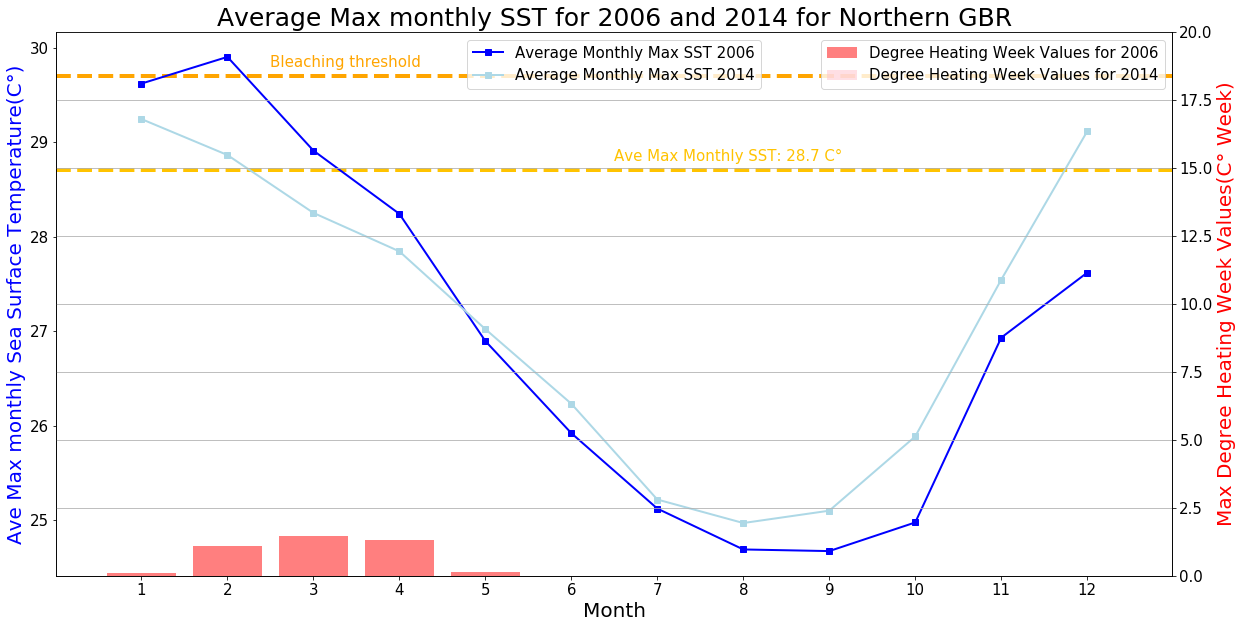

In [15]:
#Low
#Chart a line plot for Average Maximum Monthly SST for 2006 and 2014 with Bleaching Threshold

#Creating a figure and axis objects with subplots
fig, ax = plt.subplots(figsize=(20,10))

#Setting formatting for axis labels
plt.xlabel("Month", fontsize="20")
plt.xticks(mean_sstmax_grouped_2006_df ['Month'], fontsize="15")

plt.yticks(fontsize='15')
plt.ylabel('Ave Max monthly Sea Surface Temperature(C°)', color='blue', fontsize=20)


#From Data link: https://coralreefwatch.noaa.gov/product/vs/data.php
#Averaged Maximum Monthly Mean: 28.7041
ave_sst_mean = 28.7041
plot5 = plt.axhline([ave_sst_mean], linewidth='4', color='#FFC300', linestyle='dashed')
plt.annotate("Ave Max Monthly SST: 28.7 C°",(6.5,28.8),fontsize=15,color="#FFC300")

#Bleaching Threshold is 1 C° more than the Averaged Maximum Monthly Mean
#Link Source: http://elibrary.gbrmpa.gov.au/jspui/handle/11017/2981
bleaching_thresh = 29.7041
plot6 = plt.axhline([bleaching_thresh], linewidth='4', color='orange', linestyle='dashed')
plt.annotate("Bleaching threshold",(2.5,29.8),fontsize=15,color="orange")

#line plot for Average Maximum Monthly SST for 2006
plot1 = plt.plot(mean_sstmax_grouped_2006_df ['Month'], mean_sstmax_grouped_2006_df ['Average Monthly Max SST'], 
         marker="s", color="blue", linewidth=2, label="Average Monthly Max SST 2006")


#line plot for Average Maximum Monthly SST for 2014
plot2= plt.plot(mean_sstmax_grouped_2014_df ['Month'], mean_sstmax_grouped_2014_df ['Average Monthly Max SST'], 
        marker="s", color="lightblue", linewidth=2, label="Average Monthly Max SST 2014")

#Setting the legend for plots 5,1,2,3
plt.legend( loc="upper center", fontsize='15')

#Using twin object for two different y-axis
ax2 = ax.twinx()


#bar plot for Degree Heating Week values for 2006
plot3 = ax2.bar(dhw_grouped_2006_df['Month'], dhw_grouped_2006_df['Degree Heating Week Values'],
                                 label='Degree Heating Week Values for 2006',color='red', alpha=0.5, align='center')

#bar plot for Degree Heating Week values for 2014
plot4 = ax2.bar(dhw_grouped_2014_df['Month'], dhw_grouped_2014_df['Degree Heating Week Values'],
                                 label='Degree Heating Week Values for 2014',color='pink', alpha=0.5, align='center')


#Setting label for bar plot y-axis
plt.yticks(fontsize="15")
ax2.set_ylabel('Max Degree Heating Week Values(C° Week)', color='red', fontsize=20)
ax2.set_ylim(0,20)

#Setting Title
plt.title("Average Max monthly SST for 2006 and 2014 for Northern GBR", fontsize="25")

#Setting the legend for plots 3,4
plt.legend(loc="upper right", fontsize='15')

plt.grid(True)

plt.savefig(f"Output/Ave STT Max and threshold for 2006 and 2014.png")


plt.show()



In [16]:
#Cleaning up Degree Heating Week Values for 2006
dhw_grouped_2006_df['Degree Heating Week Values'] = dhw_grouped_2006_df['Degree Heating Week Values'].astype(float)
dhw_grouped_2006_df['Degree Heating Week Values'] = dhw_grouped_2006_df['Degree Heating Week Values'].map("{:,.2f}".format)

#Saving dataframe into cvs file
dhw_grouped_2006_df.to_csv(f"Output/Ave STT Max and threshold for 2006.csv")

dhw_grouped_2006_df

,Years,Month,Degree Heating Week Values
0,2006,1,0.10
1,2006,2,1.08
2,2006,3,1.46
3,2006,4,1.31
4,2006,5,0.15
5,2006,6,0.00
6,2006,7,0.00
7,2006,8,0.00
8,2006,9,0.00
9,2006,10,0.00


In [17]:
#Cleaning up Degree Heating Week Values for 2014
dhw_grouped_2014_df['Degree Heating Week Values'] = dhw_grouped_2014_df['Degree Heating Week Values'].astype(float)
dhw_grouped_2014_df['Degree Heating Week Values'] = dhw_grouped_2014_df['Degree Heating Week Values'].map("{:,.2f}".format)

#Saving dataframe into cvs file
dhw_grouped_2014_df.to_csv(f"Output/Ave STT Max and threshold for 2014.csv")

dhw_grouped_2014_df

,Years,Month,Degree Heating Week Values
0,2014,1,0.00
1,2014,2,0.00
2,2014,3,0.00
3,2014,4,0.00
4,2014,5,0.00
5,2014,6,0.00
6,2014,7,0.00
7,2014,8,0.00
8,2014,9,0.00
9,2014,10,0.00


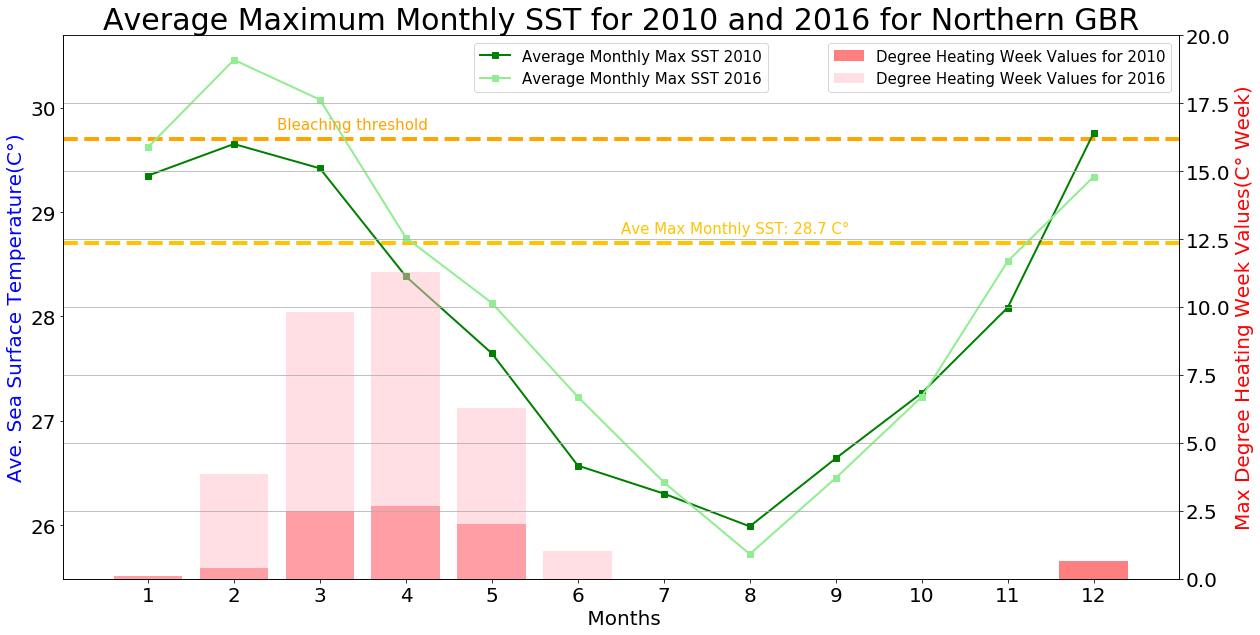

In [18]:
#High
#Chart a line plot for Average Maximum Monthly SST for 2010 and 2016 with Bleaching Threshold

#Creating a figure and axis objects with subplots
fig, ax = plt.subplots(figsize=(20,10))


#Setting formatting for axis labels
plt.xlabel(" Months", fontsize="20")
plt.xticks(mean_sstmax_grouped_2010_df ['Month'], fontsize="20")

plt.yticks(fontsize='20')

plt.ylabel('Ave. Sea Surface Temperature(C°)', color='blue', fontsize=20)

#From Data link: https://coralreefwatch.noaa.gov/product/vs/data.php
#Averaged Maximum Monthly Mean: 28.7041
ave_sst_mean = 28.7041
plot5 = plt.axhline([ave_sst_mean], linewidth='4', color='#FFC300', linestyle='dashed')
plt.annotate("Ave Max Monthly SST: 28.7 C°",(6.5,28.8),fontsize=15,color="#FFC300")

#Bleaching Threshold is 1 C° more than the Averaged Maximum Monthly Mean
#Link Source: http://elibrary.gbrmpa.gov.au/jspui/handle/11017/2981
bleaching_thresh = 29.7041
plot6 = plt.axhline([bleaching_thresh], linewidth='4', color='orange', linestyle='dashed')
plt.annotate("Bleaching threshold",(2.5,29.8),fontsize=15,color="orange")

#line plot for Average Maximum Monthly SST for 2010
plot1 = plt.plot(mean_sstmax_grouped_2010_df ['Month'], mean_sstmax_grouped_2010_df ['Average Monthly Max SST'], 
         marker="s", color="green", linewidth=2, label="Average Monthly Max SST 2010")


#line plot for Average Maximum Monthly SST for 2016
plot2= plt.plot(mean_sstmax_grouped_2016_df ['Month'], mean_sstmax_grouped_2016_df ['Average Monthly Max SST'], 
        marker="s", color="lightgreen", linewidth=2, label="Average Monthly Max SST 2016")

#Setting legend for plots 1,2,5
plt.legend( loc="upper center", fontsize='15')

#Using twin object for two different y-axis
ax2 = ax.twinx()



#bar plot for Degree Heating Week values for 2010
plot3 = ax2.bar(dhw_grouped_2010_df['Month'], dhw_grouped_2010_df['Degree Heating Week Values'],
                                 label='Degree Heating Week Values for 2010',color='red', alpha=0.5, align='center')

#bar plot for Degree Heating Week values for 2016
plot4 = ax2.bar(dhw_grouped_2016_df['Month'], dhw_grouped_2016_df['Degree Heating Week Values'],
                                 label='Degree Heating Week Values for 2016',color='pink', alpha=0.5, align='center')



#Setting label for bar plot y-axis
plt.yticks(fontsize="20")
ax2.set_ylabel('Max Degree Heating Week Values(C° Week)', color='red', fontsize=20)
ax2.set_ylim(0,20)

#Setting Title
plt.title("Average Maximum Monthly SST for 2010 and 2016 for Northern GBR", fontsize="30")


#Setting the legend for plots 3, 4
plt.legend( loc="best", fontsize='15')


plt.grid(True)

plt.savefig(f"Output/Ave STT Max and threshold for 2010 and 2016.png")


plt.show()



In [19]:
#Cleaning up Degree Heating Week Values for 2010
dhw_grouped_2010_df['Degree Heating Week Values'] = dhw_grouped_2010_df['Degree Heating Week Values'].astype(float)
dhw_grouped_2010_df['Degree Heating Week Values'] = dhw_grouped_2010_df['Degree Heating Week Values'].map("{:,.2f}".format)

#Saving dataframe into cvs file
dhw_grouped_2010_df.to_csv(f"Output/Ave STT Max and threshold for 2010.csv")

dhw_grouped_2010_df


,Years,Month,Degree Heating Week Values
0,2010,1,0.10
1,2010,2,0.41
2,2010,3,2.51
3,2010,4,2.68
4,2010,5,2.03
5,2010,6,0.01
6,2010,7,0.00
7,2010,8,0.00
8,2010,9,0.00
9,2010,10,0.00


In [20]:
#Cleaning up Degree Heating Week Values for 2016
dhw_grouped_2016_df['Degree Heating Week Values'] = dhw_grouped_2016_df['Degree Heating Week Values'].astype(float)
dhw_grouped_2016_df['Degree Heating Week Values'] = dhw_grouped_2016_df['Degree Heating Week Values'].map("{:,.2f}".format)

#Saving dataframe into cvs file
dhw_grouped_2016_df.to_csv(f"Output/Ave STT Max and threshold for 2016.csv")
dhw_grouped_2016_df

,Years,Month,Degree Heating Week Values
0,2016,1,0.11
1,2016,2,3.85
2,2016,3,9.81
3,2016,4,11.28
4,2016,5,6.27
5,2016,6,1.02
6,2016,7,0.00
7,2016,8,0.00
8,2016,9,0.00
9,2016,10,0.00
